In [2]:
import string
import random
import os
import pprint
import json
import requests
import urllib.request
import pyttsx3

In [3]:
media_path = "../media/"
audio_path = "../audio/"
clips_path = "../clips/"

### Download pexels video

In [4]:
# specify the URL of the archive here
archive_url = "https://www.pexels.com/video/a-sunset-time-lapse-8035714/"
pexel_video_id = int(archive_url.replace("/", "").split("-")[-1])
print(archive_url.split("/")[-2])
print(f'pexel_video_id: {pexel_video_id}')

a-sunset-time-lapse-8035714
pexel_video_id: 8035714


In [5]:
PEXEL_API_KEY = '563492ad6f917000010000011d2a823f8f9f41ecbd8ed2f5bcc381ab'
url = ' https://api.pexels.com/videos/videos/'

# payload = {'id': 8035714}
params = {'id': pexel_video_id}
headers = {'content-type': 'application/json',
           'Authorization': PEXEL_API_KEY, 
          }

response = requests.get(f'{url}{8035714}', headers=headers)
resp = json.loads(response.text)
pprint.pprint(resp)

{'avg_color': None,
 'duration': 12,
 'full_res': None,
 'height': 3840,
 'id': 8035714,
 'image': 'https://images.pexels.com/videos/8035714/4k-video-architecture-backlit-beach-8035714.jpeg?auto=compress&cs=tinysrgb&fit=crop&h=1200&w=630',
 'tags': [],
 'url': 'https://www.pexels.com/video/a-sunset-time-lapse-8035714/',
 'user': {'id': 3511482,
          'name': 'Polina Kovaleva',
          'url': 'https://www.pexels.com/@polina-kovaleva'},
 'video_files': [{'file_type': 'video/mp4',
                  'fps': 25.0,
                  'height': 1920,
                  'id': 3412845,
                  'link': 'https://player.vimeo.com/external/554200859.hd.mp4?s=98c39bed871985e82a70b170d0d1b45d4e883e7b&profile_id=175&oauth2_token_id=57447761',
                  'quality': 'hd',
                  'width': 1080},
                 {'file_type': 'video/mp4',
                  'fps': 25.0,
                  'height': 3840,
                  'id': 3412846,
                  'link': 'https://play

In [6]:
v_files = resp['video_files']
v_link = ""
v_links = [v["link"] for v in v_files]
for v in v_files:
    if v["quality"] == "hd" and v["width"] == 1080:
        v_link = v["link"]
        
# pprint.pprint(v_links)
print(v_link)

https://player.vimeo.com/external/554200859.hd.mp4?s=98c39bed871985e82a70b170d0d1b45d4e883e7b&profile_id=175&oauth2_token_id=57447761


In [7]:
bg_clip_file = "string_press.mp4"
urllib.request.urlretrieve(v_link, media_path + 'bg_clip.mp4') 

('../media/bg_clip.mp4', <http.client.HTTPMessage at 0x7fc342f309b0>)

In [7]:
bg_clip_file = "string_press.mp4"

In [8]:
import numpy as np
import moviepy.editor as mpy
import moviepy.video.fx as vfx
from moviepy.video.VideoClip import ImageClip, TextClip
from moviepy.video.compositing import CompositeVideoClip
from moviepy.video.compositing.CompositeVideoClip import *
from moviepy.editor import *

from gtts import gTTS
import cv2
import skimage.filters


print("np version {}".format(np.__version__))
print("cv2 version {}".format(cv2.__version__))
print("skimage version {}".format(skimage.__version__))

np version 1.19.5
cv2 version 4.1.2
skimage version 0.17.2


In [9]:
# Audio
from moviepy.audio.fx.all import *

music_file = "paris.mp3" #"blade_runner_synth.mp3"
music = mpy.AudioFileClip(audio_path + music_file)
#music = music.subclip(4, None)
print(f"duration: {music.duration}s")
#music.preview()

duration: 209.76s


Downloaded background clip
Width: 1080, Height 1920, fps: 30.0, duration: 326.8s



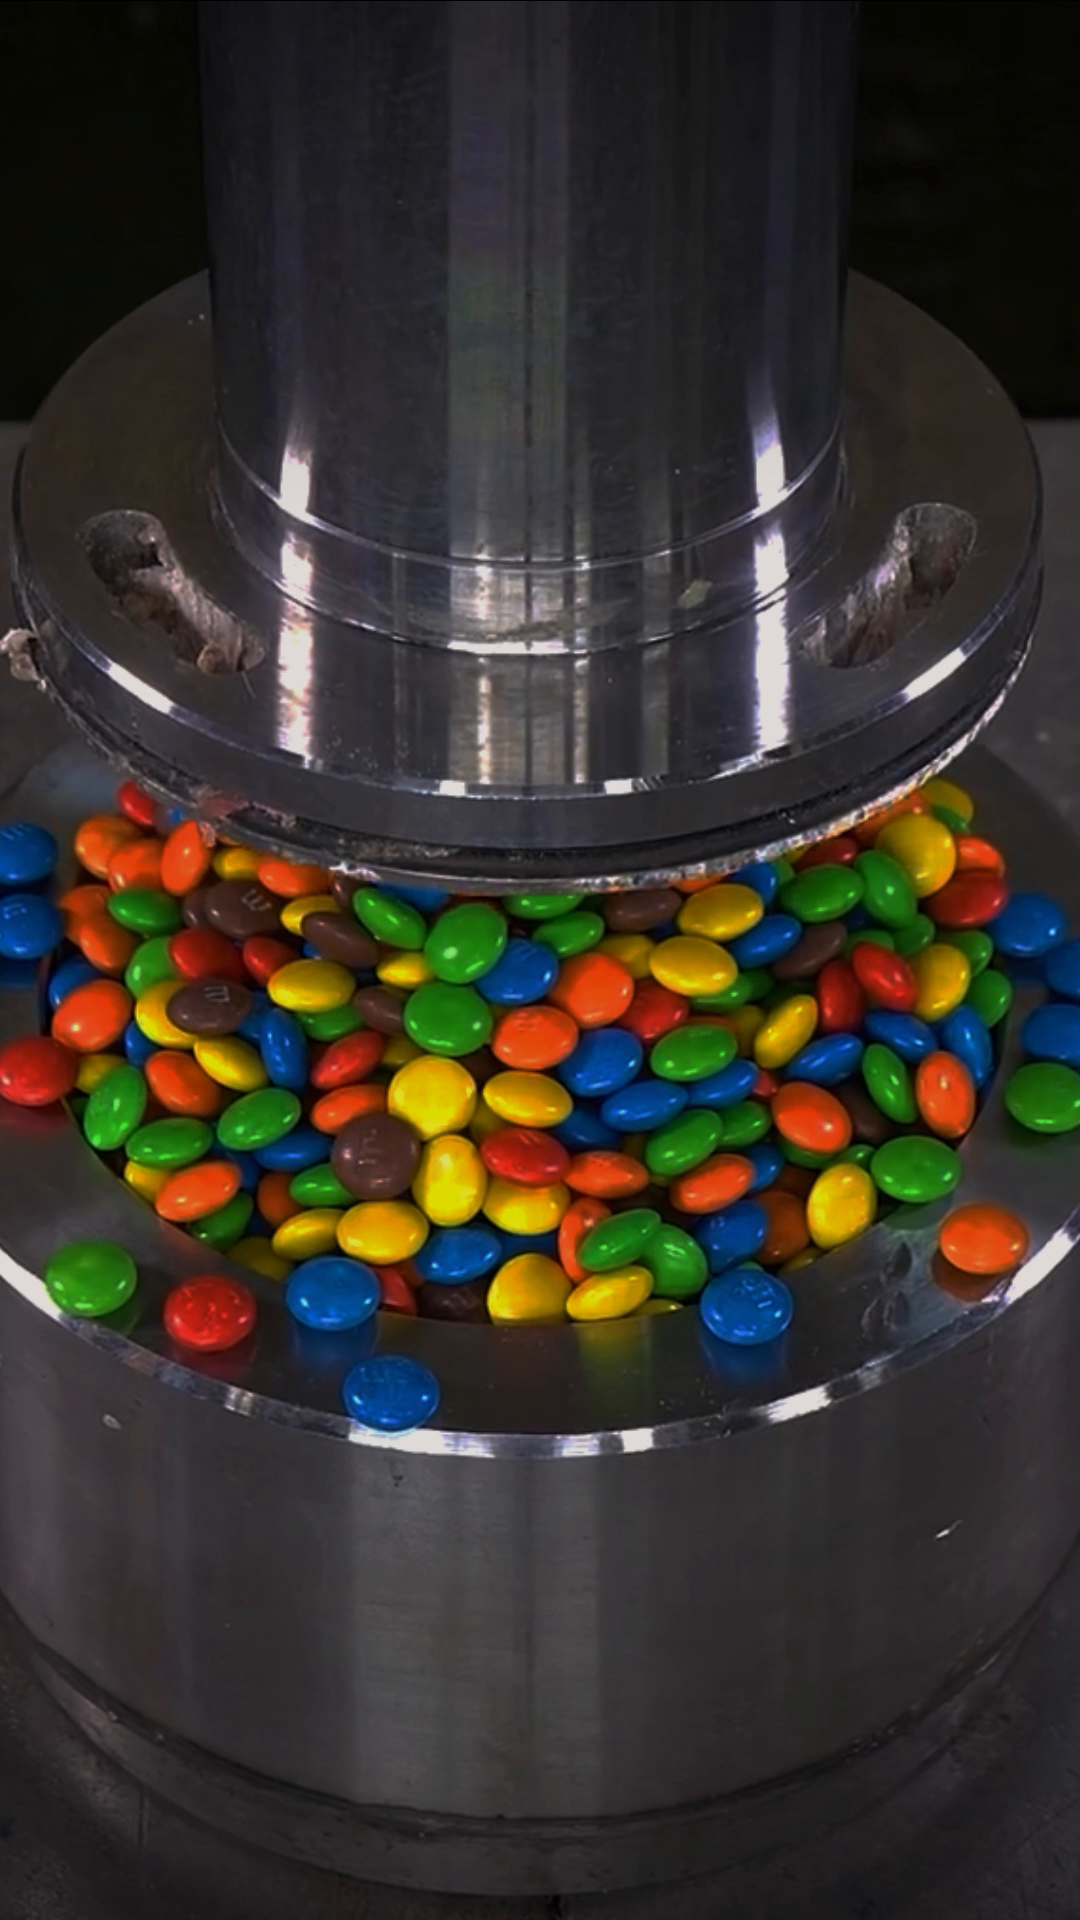

In [12]:
# Open the background clip file
select_random_start = True
bg_clip = mpy.VideoFileClip(media_path + "backgrounds/" + bg_clip_file)

fps = bg_clip.fps
width, height = bg_clip.size
duration = bg_clip.duration

print("Downloaded background clip")
print(f"Width: {width}, Height {height}, fps: {fps}, duration: {duration}s")

# Processing
bg_clip = bg_clip.without_audio()
if select_random_start:
    bg_clip = bg_clip.subclip(random.random()*(bg_clip.duration-60))
bg_clip = bg_clip.fx(vfx.make_loopable, 1).fx(vfx.loop)


bg_clip.ipython_display(t = 0, width = 300)

In [10]:
TextClip.list('font')

['ArialUnicode',
 'AvantGarde-Book',
 'AvantGarde-BookOblique',
 'AvantGarde-Demi',
 'AvantGarde-DemiOblique',
 'Bookman-Demi',
 'Bookman-DemiItalic',
 'Bookman-Light',
 'Bookman-LightItalic',
 'Courier',
 'Courier-Bold',
 'Courier-BoldOblique',
 'Courier-Oblique',
 'fixed',
 'Helvetica',
 'Helvetica-Bold',
 'Helvetica-BoldOblique',
 'Helvetica-Narrow',
 'Helvetica-Narrow-Bold',
 'Helvetica-Narrow-BoldOblique',
 'Helvetica-Narrow-Oblique',
 'Helvetica-Oblique',
 'NewCenturySchlbk-Bold',
 'NewCenturySchlbk-BoldItalic',
 'NewCenturySchlbk-Italic',
 'NewCenturySchlbk-Roman',
 'Palatino-Bold',
 'Palatino-BoldItalic',
 'Palatino-Italic',
 'Palatino-Roman',
 'proximanova-bold',
 'proximanova-extrabold',
 'proximanova-semibold',
 'Symbol',
 'Times-Bold',
 'Times-BoldItalic',
 'Times-Italic',
 'Times-Roman']

In [15]:
TextClip.list('color')

['AliceBlue',
 'AntiqueWhite',
 'AntiqueWhite1',
 'AntiqueWhite2',
 'AntiqueWhite3',
 'AntiqueWhite4',
 'aqua',
 'aquamarine',
 'aquamarine1',
 'aquamarine2',
 'aquamarine3',
 'aquamarine4',
 'azure',
 'azure1',
 'azure2',
 'azure3',
 'azure4',
 'beige',
 'bisque',
 'bisque1',
 'bisque2',
 'bisque3',
 'bisque4',
 'black',
 'BlanchedAlmond',
 'blue',
 'blue1',
 'blue2',
 'blue3',
 'blue4',
 'BlueViolet',
 'brown',
 'brown1',
 'brown2',
 'brown3',
 'brown4',
 'burlywood',
 'burlywood1',
 'burlywood2',
 'burlywood3',
 'burlywood4',
 'CadetBlue',
 'CadetBlue1',
 'CadetBlue2',
 'CadetBlue3',
 'CadetBlue4',
 'chartreuse',
 'chartreuse1',
 'chartreuse2',
 'chartreuse3',
 'chartreuse4',
 'chocolate',
 'chocolate1',
 'chocolate2',
 'chocolate3',
 'chocolate4',
 'coral',
 'coral1',
 'coral2',
 'coral3',
 'coral4',
 'CornflowerBlue',
 'cornsilk',
 'cornsilk1',
 'cornsilk2',
 'cornsilk3',
 'cornsilk4',
 'crimson',
 'cyan',
 'cyan1',
 'cyan2',
 'cyan3',
 'cyan4',
 'DarkBlue',
 'DarkCyan',
 'DarkGol

In [13]:
texts = ["Scary facts that will keep you awake",
         "Dead skin cells are a main ingredient in household dust.",
         "There are over 250,000 deaths a year due to medical error.", 
         "There's a 1-in-3 chance police will never identify your killer if you're murdered in the US."]
text_clips = []
title_is_first = True

for i, t in enumerate(texts):
    size = 78
    bg_color = "transparent"
    color = "white" 
    stroke_width = 3
    stroke_color = "black"
    font='proximanova-extrabold'
    kerning=-4,
    if i == 0 and title_is_first:
        size = 103
        bg_color = "AntiqueWhite"
        color = "black"
        stroke_width = 3
        stroke_color = "black"
        font='proximanova-semibold'
        kerning=-2,
    text_width = width-200             
    t_clip = TextClip(txt = t, 
                    size=(text_width, None), # Height will be auto-determined
                    color=color, 
                    bg_color=bg_color,
                    fontsize=size, 
                    font=font,# 'Helvetica-Bold''ArialUnicode',
                    stroke_color=stroke_color, 
                    stroke_width=stroke_width, 
                    method='caption', 
                    kerning=kerning, 
                    align='center')
    text_height = t_clip.size[1]
    
    # Add speech
    speech = gTTS(t, lang='en') #tld='co.uk')
    speech.save(audio_path + f"speech_{i}.mp3")
    speech_clip = mpy.AudioFileClip(audio_path + f"speech_{i}.mp3")
    #os.remove(audio_path + f"speech_{i}.mp3")
    
    # PYTTSX
    #engine.say(t)
    # Save the synthesized audio to a file
    #engine.save_to_file(t, audio_path + "speech_py.mp3")
    #engine.runAndWait()
    
    
    # Add a 1 second pause at the end of each speech clip
    empty_clip = AudioClip(lambda t: 0, duration=0.75)
    speech_clip = concatenate_audioclips([speech_clip, empty_clip]).set_fps(44100)
    t_clip = t_clip.set_audio(speech_clip).set_duration(speech_clip.duration)
   
    # Add effects
    #t_clip = t_clip.fx(vfx.fadeout, 0.5)
    t_clip = t_clip.set_opacity(1)

    text_clips.append(t_clip)
    
    
text_clip = mpy.concatenate_videoclips(text_clips, method = "compose", padding = 0.5)#.set_fps(fps)
text_clip.audio = text_clip.audio.set_fps(44100)
print(f"text clip duration {text_clip.duration}")
print(text_clip.audio.duration)

text clip duration 22.840000000000003
22.840000000000003


In [15]:
#text_clip.preview(fps = 25)

In [14]:
# Combine text clip with background video

# Make background clip loopable in case the text is longer
final_bg_clip = bg_clip.copy()
#final_bg_clip = final_bg_clip.fx(vfx.time_symmetrize)
print("final_bg_clip duration {}".format(final_bg_clip.duration))


clip = CompositeVideoClip([final_bg_clip, text_clip.set_position(("center",height*0.17))], use_bgclip = True)
print("composite clip duration {}".format(clip.duration))


# Add music to clip
music = music.fx(volumex, 0.65).set_duration(clip.duration).fx(audio_fadein, 0.5)
comp_audio = mpy.CompositeAudioClip([music, clip.audio.fx(volumex, 1.4)])
comp_audio = comp_audio.set_duration(clip.duration).set_fps(44100)
clip = clip.set_audio(comp_audio)

print("final_clip duration {}".format(clip.duration))
print(clip.fps)
print(clip.size)

final_bg_clip duration None
composite clip duration 22.840000000000003
final_clip duration 22.840000000000003
30.0
(1080, 1920)


In [17]:
# Keep fps low or it will be slowed down
clip.preview(fps=5, audio = True)

In [65]:
clip.write_videofile(clips_path + "test.mp4", audio_codec='aac')

chunk:   7%|▋         | 33/505 [00:00<00:01, 291.75it/s, now=None]

Moviepy - Building video ../clips/test.mp4.
MoviePy - Writing audio in testTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/686 [00:00<?, ?it/s, now=None]               

MoviePy - Done.
Moviepy - Writing video ../clips/test.mp4



Moviepy - Done !
Moviepy - video ready ../clips/test.mp4


In [147]:
# clip.preview(fps = fps)

time, position, color :  0.400, (47, 1520), [32 22 16]
time, position, color :  0.440, (47, 1520), [30 23 16]
time, position, color :  0.480, (47, 1520), [30 23 18]


In [11]:
# Save the output video file
# blurred_clip.write_videofile(f"../media/blurred_mpy_{video_file}")

In [134]:
import numpy as np

from moviepy.editor import *
from moviepy.video.tools.segmenting import findObjects

# WE CREATE THE TEXT THAT IS GOING TO MOVE, WE CENTER IT.

screensize = (1080,1920)
txtClip = TextClip('Cool effect',color='white', font="Amiri-Bold",
                   kerning = 5, fontsize=100)
cvc = CompositeVideoClip( [txtClip.set_position('center')],
                        size=screensize)

# THE NEXT FOUR FUNCTIONS DEFINE FOUR WAYS OF MOVING THE LETTERS


# helper function
rotMatrix = lambda a: np.array( [[np.cos(a),np.sin(a)], 
                                 [-np.sin(a),np.cos(a)]] )

def vortex(screenpos,i,nletters):
    d = lambda t : 1.0/(0.3+t**8) #damping
    a = i*np.pi/ nletters # angle of the movement
    v = rotMatrix(a).dot([-1,0])
    if i%2 : v[1] = -v[1]
    return lambda t: screenpos+400*d(t)*rotMatrix(0.5*d(t)*a).dot(v)
    
def cascade(screenpos,i,nletters):
    v = np.array([0,-1])
    d = lambda t : 1 if t<0 else abs(np.sinc(t)/(1+t**4))
    return lambda t: screenpos+v*400*d(t-0.15*i)

def arrive(screenpos,i,nletters):
    v = np.array([-1,0])
    d = lambda t : max(0, 3-3*t)
    return lambda t: screenpos-400*v*d(t-0.2*i)
    
def vortexout(screenpos,i,nletters):
    d = lambda t : max(0,t) #damping
    a = i*np.pi/ nletters # angle of the movement
    v = rotMatrix(a).dot([-1,0])
    if i%2 : v[1] = -v[1]
    return lambda t: screenpos+400*d(t-0.1*i)*rotMatrix(-0.2*d(t)*a).dot(v)



# WE USE THE PLUGIN findObjects TO LOCATE AND SEPARATE EACH LETTER

letters = findObjects(cvc) # a list of ImageClips


# WE ANIMATE THE LETTERS

def moveLetters(letters, funcpos):
    return [ letter.set_position(funcpos(letter.screenpos,i,len(letters)))
              for i,letter in enumerate(letters)]

clips = [ CompositeVideoClip( moveLetters(letters,funcpos),
                              size = screensize).subclip(0,5)
          for funcpos in [vortex, cascade, arrive, vortexout] ]

# WE CONCATENATE EVERYTHING AND WRITE TO A FILE

#final_clip = concatenate_videoclips(clips)
#final_clip.write_videofile('../../coolTextEffects.avi',fps=25,codec='mpeg4')

In [197]:
# from moviepy.video.tools.drawing import circle
texts = ["Crazy facts you need to know (Pt.1) but it gets longer", "A shrimp's heart is in it's head.", "Ronaldo is better than Messi.", "A boxer can run at 35 mph and this is very long"]
text_clips = []
title_is_first = True
effect_clip = None

text_effects = [ None for _ in texts]
#text_effects[0] = cascade

for i, t in enumerate(texts):
    size = 75
    bg_color = "transparent"
    color = "white" 
    stroke_width = 2.5
    stroke_color = "black"
    if i == -1 and title_is_first:
        size = 82
        bg_color = "white"
        color = "black"
        stroke_width = 2
        stroke_color = "white"
        
    text_width = width-175             
    t_clip = TextClip(txt = t, 
                    size=(text_width, None), # Height will be auto-determined
                    color=color, 
                    bg_color=bg_color,
                    fontsize=size, 
                    font='Helvetica-Bold',#'ArialUnicode',#'ArialUnicode',#'Segoe-UI-Emoji',#'Courier', 
                    stroke_color=stroke_color, 
                    stroke_width=1, 
                    #method='caption', 
                    kerning=-3)#, 
                    #align='center')
        
    t_clip = TextClip(txt=t,
                      size=(text_width, None),
                      bg_color = bg_color,
                      color='white', font="Amiri-Bold", stroke_color=None, 
                      stroke_width=2.5, 
                      method = "caption",
                      kerning = -3, 
                      fontsize=100)
    text_height = t_clip.size[1]
    
    # Add speech
    speech = gTTS(t, lang='en') #tld='co.uk')
    speech.save(audio_path + "speech.mp3")
    speech_clip = mpy.AudioFileClip(audio_path + "speech.mp3")#.set_duration(speech_clip.duration + 1)
    
    # Add a 1 second pause at the end of each speech clip
    empty_clip = AudioClip(lambda t: 0, duration=1)
    speech_clip = concatenate_audioclips([speech_clip, empty_clip]).set_fps(44100)
    t_clip = t_clip.set_audio(speech_clip).set_duration(speech_clip.duration)
   
    # Add effects
    #t_clip = t_clip.fx(vfx.fadeout, 0.5)
    t_clip = t_clip.set_opacity(1)
    
    # Add cool effects to text
    cvc = CompositeVideoClip([t_clip.set_position(("center",height*0.25))], size=screensize)
    letters = findObjects(cvc)
    
    if text_effects[i] is not None:
        effect_clip = CompositeVideoClip(moveLetters(letters,cascade), size = screensize).subclip(0,5)
        #effect_clip = effect_clip.set_audio(speech_clip).set_duration(speech_clip.duration)


    # Add mask
    def fly_off_animation(clip, t):
        print(type(clip))
        return clip.set_pos(('center', -t*1080))

    # Create the moving clip
    #moving_clip = text_clip.fl(fly_off_animation)
    
    #t_clip = t_clip.fx(vfx.scroll,h = 1080, w = 1080, x_speed = 10)
    #scroll = vfx.scroll(t_clip, h=1920, w=1080, y_start = 100, x_speed = 100)
    w, h = 1080, 1920
    t1 = text_clip.on_color(size = (w,h), pos=(6, 'center'))
    moving = t1.set_position(lambda t: ( "center",50*t))
    moving.audio = moving.audio.set_fps(44100)
    
    text_clips.append(t_clip)
    
    
    
text_clip = mpy.concatenate_videoclips(text_clips, method = "compose", padding = 0.5)#.set_fps(fps)
text_clip.audio = text_clip.audio.set_fps(44100)
print(f"text clip duration {text_clip.duration}")

text clip duration 20.05


In [198]:
#text_clip.preview(fps=5)

In [191]:
scroll.size

(905, 288)

In [199]:
moving.preview(fps=5)

time, position, color :  2.000, (513, 521), [0 0 0]
time, position, color :  2.000, (513, 521), [0 0 0]
time, position, color :  2.000, (513, 521), [0 0 0]
time, position, color :  2.000, (513, 521), [0 0 0]
time, position, color :  2.000, (513, 521), [0 0 0]
time, position, color :  2.000, (513, 521), [0 0 0]
time, position, color :  2.000, (513, 521), [0 0 0]
time, position, color :  2.000, (513, 521), [0 0 0]
time, position, color :  2.000, (513, 521), [0 0 0]
time, position, color :  2.000, (513, 521), [0 0 0]
time, position, color :  2.000, (513, 521), [0 0 0]
time, position, color :  2.200, (513, 521), [0 0 0]
time, position, color :  8.200, (451, 540), [0 0 0]
Interrupt


[{'color': array([0, 0, 0], dtype=uint8), 'position': (513, 521), 'time': 2.0},
 {'color': array([0, 0, 0], dtype=uint8), 'position': (513, 521), 'time': 2.0},
 {'color': array([0, 0, 0], dtype=uint8), 'position': (513, 521), 'time': 2.0},
 {'color': array([0, 0, 0], dtype=uint8), 'position': (513, 521), 'time': 2.0},
 {'color': array([0, 0, 0], dtype=uint8), 'position': (513, 521), 'time': 2.0},
 {'color': array([0, 0, 0], dtype=uint8), 'position': (513, 521), 'time': 2.0},
 {'color': array([0, 0, 0], dtype=uint8), 'position': (513, 521), 'time': 2.0},
 {'color': array([0, 0, 0], dtype=uint8), 'position': (513, 521), 'time': 2.0},
 {'color': array([0, 0, 0], dtype=uint8), 'position': (513, 521), 'time': 2.0},
 {'color': array([0, 0, 0], dtype=uint8), 'position': (513, 521), 'time': 2.0},
 {'color': array([0, 0, 0], dtype=uint8), 'position': (513, 521), 'time': 2.0},
 {'color': array([0, 0, 0], dtype=uint8), 'position': (513, 521), 'time': 2.2},
 {'color': array([0, 0, 0], dtype=uint8)

In [182]:

background_clip = ColorClip((1080, 1920), color=(0, 0, 0))
composite_clip = CompositeVideoClip([background_clip, scroll])
composite_clip = composite_clip.set_duration(scroll.duration)
composite_clip.audio = composite_clip.audio.set_fps(44100)
composite_clip.preview(fps=5)

In [284]:
len(letters)

36

In [285]:
effect_clip.duration

5

In [137]:
effect_clip.preview(fps=8)

In [278]:
effect_clip.write_videofile(media_path + "coo_effects.mp4",fps=25,codec='mpeg4')

t:   2%|▏         | 3/125 [00:00<00:04, 27.30it/s, now=None]

Moviepy - Building video ../media/coo_effects.mp4.
Moviepy - Writing video ../media/coo_effects.mp4



Moviepy - Done !
Moviepy - video ready ../media/coo_effects.mp4


### One word at a time

In [260]:
# Exploding title words
# Create a function that will take a word as input and return an mpy.TextClip
# object that shows onto the screen and has audio of the word being spoken
# using gTTS
def create_word_text_clip(word):
    # Create a TextClip object with the given word and a white color
    size = 75
    bg_color = "transparent"
    color = "white" 
    stroke_width = 2.5
    stroke_color = "black"
    text_clip_word = TextClip(txt = word, 
                    size=(text_width, None), # Height will be auto-determined
                    color="white", 
                    bg_color=bg_color,
                    fontsize=size, 
                    font='Helvetica-Bold',#'ArialUnicode',#'ArialUnicode',#'Segoe-UI-Emoji',#'Courier', 
                    stroke_color=stroke_color, 
                    stroke_width=stroke_width, 
                    method='caption', 
                    kerning=-3, 
                    align='center')

    # Use gTTS to generate audio for the given word
    speech = gTTS(word, slow = False)
    speech.save(audio_path + "speech.mp3")
    speech_clip = mpy.AudioFileClip(audio_path + "speech.mp3")
    
    speech_clip = speech_clip#.fx(vfx.speedx, 1)
    # Set the audio for the TextClip
    text_clip_word = text_clip_word.set_audio(speech_clip).set_duration(speech_clip.duration)

    # Use moviepy's compositing functionality to create an exploding effect
    # for the TextClip by setting the growth parameter to a high value
    text_clip_word = text_clip_word.set_position('center').set_duration(text_clip_word.duration).set_opacity(1).set_start(0)
    #text_clip_explode = text_clip_word.fx(mpy.vfx.composite, 'Explosion', growth=500, color=[255, 255, 255])

    # Return the final TextClip with the exploding effect and audio
    return text_clip_word

sentence = "Crazy facts you need to know right now! (Pt1)"
words = sentence.split(" ")

# Create a list of TextClip objects for each word
word_clips = [create_word_text_clip(word) for word in words]

# Use moviepy's concatenate function to join the TextClip objects into a single
# video clip
title_clip = concatenate_videoclips(word_clips)
title_clip.audio = title_clip.audio.set_fps(44100)

print(f"title clip duration {title_clip.duration}")
# Write the video clip to a file
#final_clip.write_videofile('output.mp4', fps=24)

KeyboardInterrupt: 

In [ ]:
title_clip.preview(fps=5)

In [65]:
word_clips

In [20]:
subclip_times = [
    ("0:11", "0:17"),
    ("0:28", "0:43"),
    ("0:44", "0:52"),
    ("0:53", "1:05"),
    ("1:06", "1:14"),
    ("1:35", "1:42"),
    ("1:43", "1:56"),
    ("1:57", "2:07"),
    ("2:08", "2:20"),
    ("2:41", "2:57"),
    ("2:59", "3:13"),
    ("3:14", "3:22"),
    ("3:24", "3:33"),
    ("3:34", "3:49"),
    ("3:50", "4:03"),
    ("4:12", "4:27"),
    ("4:28", "4:39"),
]

print(len(subclip_times))
def convert_ts_to_sec(ts):
    ts = ts.split(":")
    return int(ts[0])*60 + int(ts[1])


subclip_times = [(convert_ts_to_sec(s[0]), convert_ts_to_sec(s[1])) for s in subclip_times]
subclip_times

17


[(11, 17),
 (28, 43),
 (44, 52),
 (53, 65),
 (66, 74),
 (95, 102),
 (103, 116),
 (117, 127),
 (128, 140),
 (161, 177),
 (179, 193),
 (194, 202),
 (204, 213),
 (214, 229),
 (230, 243),
 (252, 267),
 (268, 279)]

In [13]:
video_file

'Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4'

In [21]:
# Get full video 
# video_clip = blurred_clip
video_clip = mpy.VideoFileClip(f"../media/blurred_mpy_{video_file}")
fps = video_clip.fps
width, height = video_clip.size
print(f"Width: {width}, Height {height}, fps: {fps}")

Width: 1130, Height 720, fps: 25.0


In [23]:
# Get background
final_size = (900, 1600)
bg = ImageClip("../media/images/neymar_wallpaper.jpeg")
bg = bg.resize(final_size)
bg = bg.set_duration(1)
#bg.preview()

In [24]:
# Create subclips
from moviepy.video.compositing.CompositeVideoClip import *
from moviepy.video.VideoClip import *

only_do_first = False
use_background_image = False

#bg_color = "black"

subclips = []
for i, (start, end) in enumerate(subclip_times[:]):
    if only_do_first:
        if i > 1: break
            
    subclip = video_clip.subclip(start,end)
    duration = subclip.duration
    
    # Add music
    music_clip = music.fx(volumex, 0.5).fx(audio_fadein, 1)
    new_audioclip = mpy.CompositeAudioClip([subclip.audio.fx(volumex, 2), music_clip])
    new_audioclip = new_audioclip.set_duration(duration).set_fps(44100)
    subclip = subclip.set_audio(new_audioclip)
    
    # Resize
    # Crop clip
    subclip = fx.all.crop(subclip, x2 = 1080)
    subclip = subclip.resize(width = final_size[0])
    s_size, s_width = subclip.size
    
    #Layer over backgroud
    subclip = subclip.set_position(("center",  "center"))
    
    if use_background_image:
        subclip = CompositeVideoClip([bg, subclip], use_bgclip = True).set_audio(new_audioclip)
    else:
        # Set black background
        bg_color_clip = ColorClip(final_size, color = (0,0,0), duration=duration)
        subclip = CompositeVideoClip([bg_color_clip, subclip], use_bgclip = True).set_audio(new_audioclip)
    
    subclips.append(subclip)
    
print(subclips)

[<moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3941df828>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3622fe898>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3622fe4e0>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3622fe6d8>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc362314cc0>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc36230e3c8>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc36230ea90>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3622f9198>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3622f9860>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3622f9f28>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7f

In [25]:
# Display clip in notebook

# subclips[0].audio.preview()

# subclips[0].ipython_display(width = 480, fps = 15)
  
# Externally previewing the subclip at fps = 20, pick a random subclip
random_index = random.choice(range(len(subclips)))
subclips[random_index].preview(fps = 20)

time, position, color :  6.750, (259, 612), [103 115  38]
time, position, color :  6.750, (259, 612), [103 115  38]
time, position, color :  6.750, (259, 612), [103 115  38]
time, position, color :  6.750, (259, 612), [103 115  38]
time, position, color :  6.750, (259, 612), [103 115  38]
time, position, color :  6.750, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position

[{'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.75},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.75},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.75},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.75},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.75},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.75},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.8},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.8},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.8},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.8},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.8},
 {'c

In [19]:
# Save subclips
only_save_first = False
for i, clip in enumerate(subclips[11:]):
    if only_save_first:
        if i > 0:
            break
    clip.write_videofile(f"../clips/black_bg_clip{i}_{video_file}", audio_codec='aac')

chunk:   0%|          | 0/155 [00:00<?, ?it/s, now=None]

Moviepy - Building video ../clips/black_bg_clip0_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip0_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/175 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip0_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip0_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip1_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip1_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/325 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip1_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/221 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip1_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip2_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip2_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip2_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/265 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip2_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip3_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip3_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/300 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip3_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/353 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip3_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip4_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip4_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/400 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip4_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/309 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip4_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip5_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip5_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/350 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip5_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/177 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip5_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip6_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip6_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/200 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip6_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/199 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip6_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip7_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip7_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/225 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip7_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/331 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip7_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip8_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip8_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/375 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip8_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/287 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip8_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip9_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip9_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/325 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip9_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/331 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip9_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip10_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip10_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/375 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip10_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/243 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip10_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip11_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip11_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   1%|          | 2/275 [00:00<00:14, 18.80it/s, now=None]      

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip11_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip11_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4


### Upload to youtube

In [9]:
# Get all the clips 
clip_files = sorted(os.listdir('../clips/'))
clip_file = "../clips/" + clip_files[3]
print(f"Video to upload: {clip_file}")

Video to upload: ../clips/black_bg_clip1_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4


In [159]:
import upload_video
import youtube

In [2]:
from googleapiclient.discovery import build
from apiclient.http import MediaFileUpload
import google.oauth2.credentials
# from oauth2client.client import flow_from_clientsecrets
import json 

In [3]:
## Datetime exploration

import datetime
# Get the current date and time
now = datetime.datetime.now()

# Calculate tomorrow's date by adding one day to the current date
tomorrow = now + datetime.timedelta(days=1)

# Create a datetime object for December 27th, 2022 at 12:00 AM
specific_datetime = datetime.datetime(2022, 12, 23, 19, 0)

# Convert the date and time to ISO 8601 format
iso_datetime = specific_datetime.isoformat()

print(iso_datetime)

2022-12-23T19:00:00


In [160]:
# Create a YouTube service object
youtube = upload_video.get_authenticated_service()

SystemExit: The client secrets were invalid: 
('Error opening file', 'client_secrets_1.json', 'No such file or directory', 2)

WARNING: Please configure OAuth 2.0

To make this sample run you will need to populate the client_secrets.json file
found at:

   /Users/rohanmirchandani/Desktop/Automation/src/client_secrets_1.json

with information from the API Console
https://console.cloud.google.com/

For more information about the client_secrets.json file format, please visit:
https://developers.google.com/api-client-library/python/guide/aaa_client_secrets


/Users/rohanmirchandani/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
CHANNEL_ID="UCuvWt72OMRF5xp6H9VBdmLw"
OWNER_ID="uvWt72OMRF5xp6H9VBdmLw"

In [11]:
# Set the video file and metadata
title = 'Neymar Jr crazy skills 🔥 #shorts #neymarjr #football'
description = 'Neymar Jr skills and tricks #shorts'
tags = ['shorts', 'soccer', 'neymarjr']

# Create the request body
request_body = {
    'snippet': {
        'title': title,
        'description': description,
        'tags': tags
    },
    'status': {
        'privacyStatus': 'public', # private, unlisted
        # 'publishAt':  iso_datetime  # can be set if privacyStatus=private
        'selfDeclaredMadeForKids' : False,
       
    }
}

# Create the request
request = youtube.videos().insert(
    part=",".join(request_body.keys()),
    body=request_body,
    media_body=MediaFileUpload(clip_file, mimetype='video/mp4', resumable=True),
    onBehalfOfContentOwnerChannel=CHANNEL_ID,
    onBehalfOfContentOwner=OWNER_ID
)

pprint.pprint(json.loads(request.to_json()))

{'_in_error_state': False,
 'body': '{"snippet": {"title": "Neymar Jr crazy skills \\ud83d\\udd25 #shorts '
         '#neymarjr #football", "description": "Neymar Jr skills and tricks '
         '#shorts", "tags": ["shorts", "soccer", "neymarjr"]}, "status": '
         '{"privacyStatus": "public", "selfDeclaredMadeForKids": false}}',
 'body_size': 258,
 'headers': {'accept': 'application/json',
             'accept-encoding': 'gzip, deflate',
             'content-type': 'application/json',
             'user-agent': '(gzip)',
             'x-goog-api-client': 'gdcl/2.52.0 gl-python/3.6.10'},
 'method': 'POST',
 'methodId': 'youtube.videos.insert',
 'response_callbacks': [],
 'resumable': '{"_filename": '
              '"../clips/black_bg_clip1_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4", '
              '"_mimetype": "video/mp4", "_chunksize": 104857600, '
              '"_resumable": true, "_size": 2055269, "_class": '
              '"MediaFileUpload", "_module": "goog

In [12]:
# Execute the request
response = upload_video.resumable_upload(request)

# Print the response
print(response)

Uploading file...


ResumableUploadError: <HttpError 403 when requesting None returned "The request cannot be completed because you have exceeded your <a href="/youtube/v3/getting-started#quota">quota</a>.". Details: "[{'message': 'The request cannot be completed because you have exceeded your <a href="/youtube/v3/getting-started#quota">quota</a>.', 'domain': 'youtube.quota', 'reason': 'quotaExceeded'}]">

In [190]:
video_id = response['id']

TypeError: 'NoneType' object is not subscriptable

In [123]:
# video_id = response['id']


#Note: shorts cannot have thumbnails
video_id = "gLW72MEqhZs"
thumbnail_file = "../media/images/Sparkle.png"
r = youtube.thumbnails().set(
    videoId=video_id,
    media_body=MediaFileUpload(thumbnail_file, mimetype='image/png'))
# r.execute()

{'etag': 'rmCN4BS7mUeeTQMzCZyPJhh-RFk',
 'items': [{'default': {'height': 90,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/default.jpg?sqp=CNTtnp0G&rs=AOn4CLAhpABHM0GmX8SZNbRi-srS73lsbQ',
    'width': 120},
   'high': {'height': 360,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/hqdefault.jpg?sqp=CNTtnp0G&rs=AOn4CLDNL10sUmEy2fF8z5VEkRXr6AOrjA',
    'width': 480},
   'maxres': {'height': 720,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/maxresdefault.jpg?sqp=CNTtnp0G&rs=AOn4CLDbXTyRqqRH88vzkqV_Q6YwObzDMA',
    'width': 1280},
   'medium': {'height': 180,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/mqdefault.jpg?sqp=CNTtnp0G&rs=AOn4CLCu5HhE17nlS6DLVtCkEnkSiFfwnw',
    'width': 320},
   'standard': {'height': 480,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/sddefault.jpg?sqp=CNTtnp0G&rs=AOn4CLDFkRF6ratZ9dvMEDJJ-NGeob5ceA',
    'width': 640}}],
 'kind': 'youtube#thumbnailSetResponse'}

In [132]:
from moviepy.video.tools.segmenting import find_video_period
from moviepy.video.VideoClip import TextClip, CompositeVideoClip

# Create the text clip
text = "Example Text"
text_clip = TextClip(text, fontsize=24, color='white')

# Create the circle clip
circle_clip = text_clip.on_color(size=(text_clip.w + 20, text_clip.h + 20),
                                 color=(0, 0, 0), pos=(0, 0), col_opacity=1)

# Define the expanding circle mask
final_radius = max(text_clip.w, text_clip.h) / 2 + 10
circle_mask = circle_clip.mask_circle(final_radius)

# Apply the mask to the text clip
text_clip = text_clip.set_mask(circle_mask)

# Create the composite clip
composite_clip = CompositeVideoClip([circle_clip, text_clip])

# Set the duration of the clip
duration = find_video_period(text_clip)
composite_clip = composite_clip.set_duration(duration)

ImportError: cannot import name 'find_video_period'

###  OpenCV 

In [ ]:
# Open the video file and get dimensions
video_capture = cv2.VideoCapture(video_path)
print(video_capture)

width = video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)
height = video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps =  video_capture.get(cv2.CAP_PROP_FPS)
print(f"Width: {width}, Height {height}, fps: {fps}")

# Set the output video file
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
video_writer = cv2.VideoWriter(f"../media/blurred_{video_file}", fourcc, fps, (int(width), int(height)))

In [ ]:
# OpenCV
# Loop through each frame in the video
i = 0
while False:
    
    # Read the next frame
    success, frame = video_capture.read()

    # If there are no more frames, break out of the loop
    if not success:
        break

    # Blur a section of the frame
    # x1, y1, x2, y2 = calculate_blur_region((width, height), sc_size, top_left, bottom_right)
    frame[y1:y2, x1:x2] = cv2.blur(frame[y1:y2, x1:x2], (10, 10))

    # Write the frame to the output video file
    video_writer.write(frame)
    
    if i % 1000 == 0:
        print(f"frame {i}")
    i += 1

# Release the video capture and video writer objects
video_capture.release()
video_writer.release()